In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [22]:
# มาตรฐานการเรียกใช้ statsmodels

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
pd.Timestamp.now()

Timestamp('2022-11-06 15:10:52.294030')

In [4]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/anova_one_way_wide_format.csv'
df= pd.read_csv(url)
df

,a1,a2,a3
0,6,8,13
1,8,12,9
2,4,9,11
3,5,11,8
4,3,6,7
5,4,8,12


In [11]:
df = df.melt(var_name='fertilizer', value_name='height')

In [12]:
df.describe()

,height
count,18.00000
mean,8.00000
std,2.99018
min,3.00000
25%,6.00000
50%,8.00000
75%,10.50000
max,13.00000


In [13]:
df.groupby('fertilizer').describe()

height                                              
            count  mean       std  min   25%   50%    75%   max
fertilizer                                                     
a1            6.0   5.0  1.788854  3.0  4.00   4.5   5.75   8.0
a2            6.0   9.0  2.190890  6.0  8.00   8.5  10.50  12.0
a3            6.0  10.0  2.366432  7.0  8.25  10.0  11.75  13.0

In [16]:
dm = df.groupby('fertilizer').mean()
dm

,height
fertilizer,
a1,5.0
a2,9.0
a3,10.0


<AxesSubplot: xlabel='fertilizer', ylabel='height'>

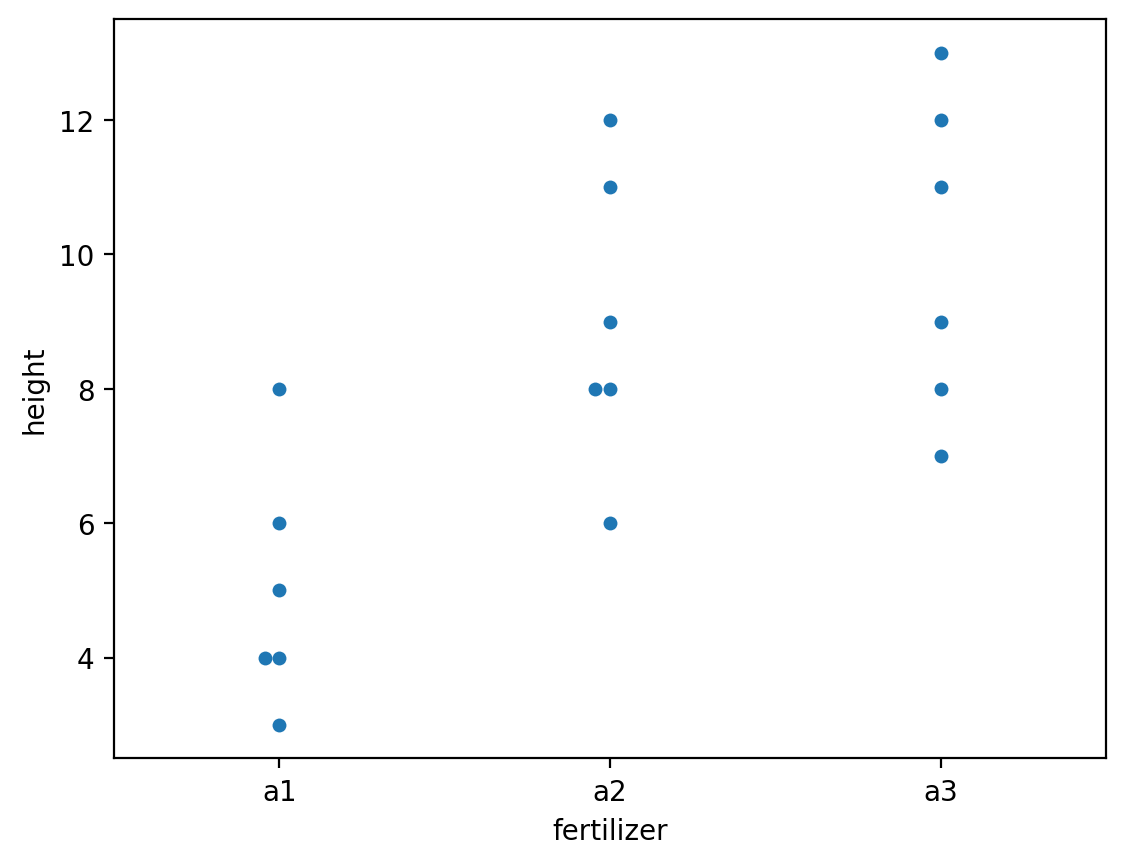

In [15]:
sns.swarmplot(x='fertilizer', y='height', data=df)

<AxesSubplot: xlabel='fertilizer', ylabel='height'>

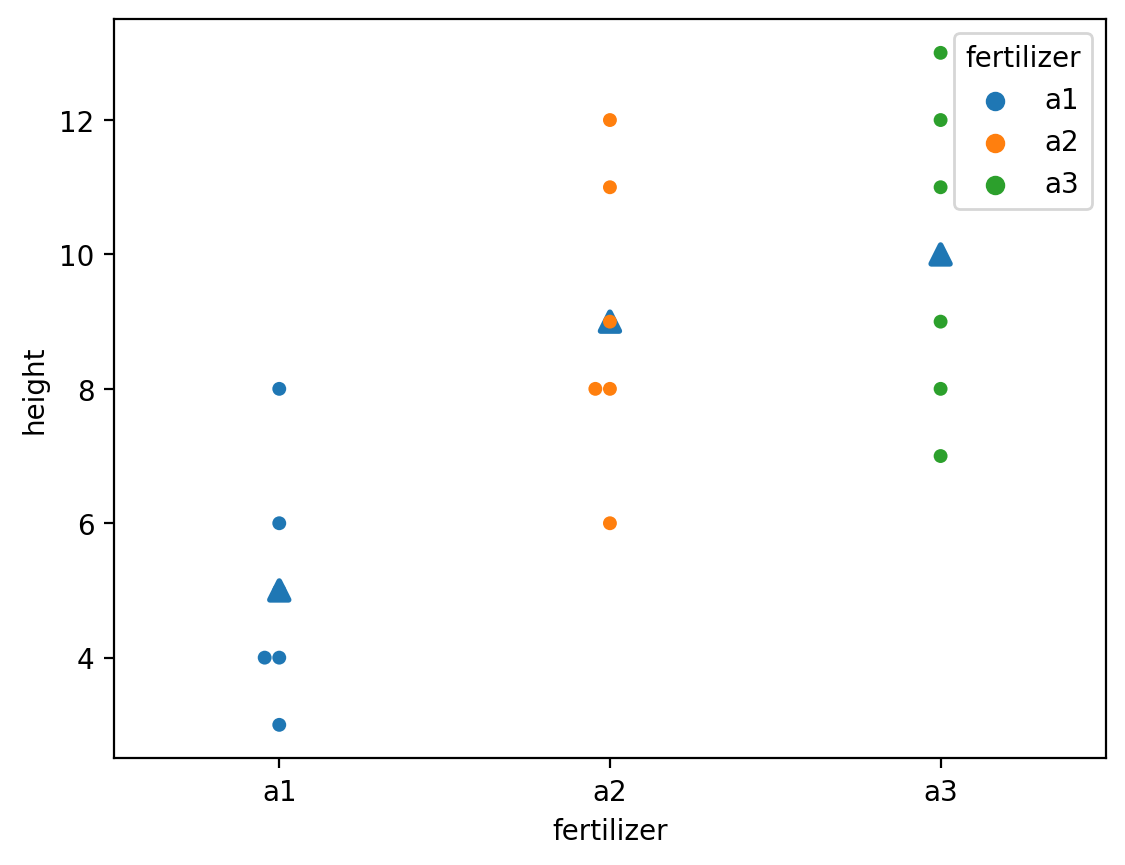

In [21]:
sns.swarmplot(x='fertilizer', y='height', data=df, hue='fertilizer')
sns.pointplot(x='fertilizer', y='height', data=dm.reset_index(),join=False, markers='^')


In [23]:
m = smf.ols(formula = 'height~ C(fertilizer)', data=df).fit()
m.summary()


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 height   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     9.265
Date:                Sun, 06 Nov 2022   Prob (F-statistic):            0.00240
Time:                        15:26:21   Log-Likelihood:                -37.503
No. Observations:                  18   AIC:                             81.01
Df Residuals:                      15   BIC:                             83.68
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.0000      0.869      5.752      0.000       3.147       6.853
C(fertilizer)[T.a2]     4.0000      1.229      3.254      0.005       1.380       6.620
C(fertilizer)[T.a3]     5.0000      1.229      4.067      0.001       2.380       7.620
==============================================================================
Omnibus:                        2.111   Durbin-Watson:                   2.279
Prob(Omnibus):                  0.348   Jarque-Bera (JB):                1.086
Skew:                           0.182   Prob(JB):                        0.581
Kurtosis:                       1.853   Cond. No.                         3.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
sm.stats.anova_lm(m)

,df,sum_sq,mean_sq,F,PR(>F)
C(fertilizer),2.0,84.0,42.000000,9.264706,0.002399
Residual,15.0,68.0,4.533333,NaN,NaN


## Tukey post-hoc test (TukeyHSD) Honest Significant Differences

In [29]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper reject
-------------------------------------------------
    a1     a2      4.0 0.0139  0.807 7.193   True
    a1     a3      5.0 0.0027  1.807 8.193   True
    a2     a3      1.0 0.7007 -2.193 4.193  False
-------------------------------------------------
